## Feature Engineering - Machine Learning Modeling - Regression


### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os
import statsmodels.api as sm
import scipy.stats as ss
import itertools

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,20150422T000000,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400.0,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1200019,20140508T000000,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160.0,900,1947,0,98166,47.4444,-122.351,2590,21891
2,1200021,20140811T000000,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460.0,0,1952,0,98166,47.4434,-122.347,2250,20023
3,2800031,20150401T000000,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010.0,420,1930,0,98168,47.4783,-122.265,1290,10320
4,3600057,20150319T000000,402500.0,4,2.00,1650,3504,1.0,0,0,...,7,760.0,890,1951,2013,98144,47.5803,-122.294,1480,3504


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21436 non-null  int64  
 1   date           21436 non-null  object 
 2   price          21436 non-null  float64
 3   bedrooms       21436 non-null  int64  
 4   bathrooms      21436 non-null  float64
 5   sqft_living    21436 non-null  int64  
 6   sqft_lot       21436 non-null  int64  
 7   floors         21436 non-null  float64
 8   waterfront     21436 non-null  int64  
 9   view           21436 non-null  int64  
 10  condition      21436 non-null  int64  
 11  grade          21436 non-null  int64  
 12  sqft_above     21434 non-null  float64
 13  sqft_basement  21436 non-null  int64  
 14  yr_built       21436 non-null  int64  
 15  yr_renovated   21436 non-null  int64  
 16  zipcode        21436 non-null  int64  
 17  lat            21436 non-null  float64
 18  long  

In [5]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1) 
missing.columns=['count', '%']
missing.sort_values(by='count') 

,count,%
id,0,0.00000
long,0,0.00000
lat,0,0.00000
zipcode,0,0.00000
yr_renovated,0,0.00000
yr_built,0,0.00000
sqft_basement,0,0.00000
grade,0,0.00000
sqft_living15,0,0.00000
condition,0,0.00000


In [6]:
for column in df.columns: 
    null_count = len(df[df[column].isna()])
print("{} : {}".format(column, null_count)) 

sqft_lot15 : 0


In [7]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) 

In [8]:
df.fillna(999, inplace=True) 

### Feature Selection & Get dummies

In [9]:
#create dummy variables for categorical features (X)
df_features = pd.get_dummies(df,columns=['sqft_living'])
df_features.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,...,sqft_living_8000,sqft_living_8010,sqft_living_8020,sqft_living_8670,sqft_living_9200,sqft_living_9640,sqft_living_9890,sqft_living_10040,sqft_living_12050,sqft_living_13540
0,1000102,20150422T000000,300000.0,6,3.00,9373,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,1200019,20140508T000000,647500.0,4,1.75,26036,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,1200021,20140811T000000,400000.0,3,1.00,43000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2800031,20150401T000000,235000.0,3,1.00,7599,1.5,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,3600057,20150319T000000,402500.0,4,2.00,3504,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#set target and drop unuseful columns
y = df_features['price']
df_features = pd.concat([df, df_features], axis=1).drop('sqft_living', axis=1)
X = df_features.drop('price', axis=1)

In [11]:
X = X.drop(['id','date','lat','long'], axis=1)

In [13]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,sqft_living_8000,sqft_living_8010,sqft_living_8020,sqft_living_8670,sqft_living_9200,sqft_living_9640,sqft_living_9890,sqft_living_10040,sqft_living_12050,sqft_living_13540
0,6,3.00,9373,2.0,0,0,3,7,2400.0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1.75,26036,1.0,0,0,4,8,1160.0,900,...,0,0,0,0,0,0,0,0,0,0
2,3,1.00,43000,1.0,0,0,3,7,1460.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.00,7599,1.5,0,0,4,6,1010.0,420,...,0,0,0,0,0,0,0,0,0,0
4,4,2.00,3504,1.0,0,0,3,7,760.0,890,...,0,0,0,0,0,0,0,0,0,0


### MODELING

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

#### Split the X and y into 75/25 training and testing data subsets

In [15]:
#train test split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

### Linear Regression

In [16]:
li_reg = LinearRegression()
li_model = li_reg.fit(X_train, y_train)
li_pred = li_model.predict(X_test)

In [19]:
print('Linear Regression Score: ', li_reg.score(X_test,y_test))

Linear Regression Score:  0.6369499558471061


### Random Forrest

In [22]:
rf_reg = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=6, min_samples_split=60, max_features='auto', verbose=0)

In [23]:
rf_model = rf_reg.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [26]:
print('Random Forrest Score: ', rf_reg.score(X_test,y_test))

Random Forrest Score:  0.702320893951491


### Linear Regression with Cross_Validation

In [36]:
li_nmse = cross_val_score(li_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")

In [37]:
li_mse_cv = -1.0 * np.mean(li_nmse).round()
li_mse_cv

199592529581209.0

### Random Forest with Cross_Validation

In [38]:
rf_nmse = cross_val_score(rf_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
rf_mse_cv = -1.0 * np.mean(rf_nmse).round()
rf_mse_cv

48005145433.0

### Run the prediction

In [42]:
test_pred = rf_model.predict(X)

In [43]:
price_prediction=pd.DataFrame(test_pred, columns= ['price'])
price_prediction.head()

,price
0,336083.550631
1,683243.471303
2,474307.537416
3,293061.435642
4,442090.195421


### Feature Importance

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor()

In [45]:
selection.feature_importances_

array([4.87236425e-03, 1.76097191e-02, 5.24990372e-03, ...,
       2.76381469e-03, 8.81118883e-03, 2.25296894e-05])

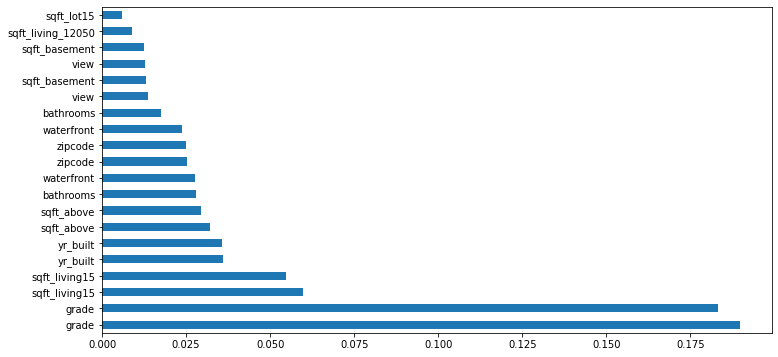

In [46]:
plt.figure(figsize = (12,6))
feat_import = pd.Series(selection.feature_importances_, index = X.columns)
feat_import.nlargest(20).plot(kind='barh')
plt.show()